In [12]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

In [13]:
data= pd.read_table('household_power_consumption.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, index_col='dt')

In [14]:
data=data['2007-01-01':'2010-11-27']

In [15]:
data["Global_active_power"] = pd.to_numeric(data["Global_active_power"], errors='coerce')
data["Global_reactive_power"] = pd.to_numeric(data["Global_reactive_power"], errors='coerce')
data["Voltage"] = pd.to_numeric(data["Voltage"], errors='coerce')
data["Global_intensity"] = pd.to_numeric(data["Global_intensity"], errors='coerce')
data["Sub_metering_1"] = pd.to_numeric(data["Sub_metering_1"], errors='coerce')
data["Sub_metering_2"] = pd.to_numeric(data["Sub_metering_2"], errors='coerce')

In [16]:
data.Global_active_power=(data.Global_active_power*1000)/60

In [17]:
#data.Global_reactive_power=(data.Global_reactive_power*1000)/60

In [18]:
data["Sub_metering_4"]= data.Global_active_power - data.Sub_metering_1 - data.Sub_metering_2 - data.Sub_metering_3

In [19]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
dt,,,,,,,,
2007-01-01 00:00:00,43.000000,0.136,241.97,10.6,0.0,0.0,0.0,43.000000
2007-01-01 00:01:00,42.533333,0.100,241.75,10.4,0.0,0.0,0.0,42.533333
2007-01-01 00:02:00,42.500000,0.100,241.64,10.4,0.0,0.0,0.0,42.500000
2007-01-01 00:03:00,42.500000,0.100,241.71,10.4,0.0,0.0,0.0,42.500000
2007-01-01 00:04:00,42.566667,0.100,241.98,10.4,0.0,0.0,0.0,42.566667


In [20]:
#decimals = pd.Series([2,2,2], index=['Global_active_power','Global_reactive_power', 'Sub_metering_4'])
#data.round(decimals)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2053263 entries, 2007-01-01 00:00:00 to 2010-11-26 21:02:00
Data columns (total 8 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
Sub_metering_4           float64
dtypes: float64(8)
memory usage: 141.0 MB


In [22]:
data.isnull().sum()

Global_active_power      25975
Global_reactive_power    25975
Voltage                  25975
Global_intensity         25975
Sub_metering_1           25975
Sub_metering_2           25975
Sub_metering_3           25975
Sub_metering_4           25975
dtype: int64

In [23]:
data=data.dropna(how='any')

In [24]:
#data.Global_active_power.resample('D').mean().plot(title='Daily Global Power', color='gray')

In [25]:
#data_M =data.resample('M').mean()
#we=data_sorted.sort_values(by='Global_active_power', ascending=False)
#data_M.head()

In [26]:
#data['Global_active_power'].resample('M').mean().plot(kind='bar',color='blue',subplots = True)

In [27]:
#data['Sub_metering_4'].resample('M').mean().plot(kind='bar',color='r',subplots = True)
#data['Sub_metering_1'].resample('M').mean().plot(kind='bar',color='red',subplots = True)

In [28]:
#data_sorted =data.resample('Y').mean()
#we=data_sorted.sort_values(by='Global_active_power', ascending=False, na_position='first')
#we.head()
#y = data['Global_active_power'].resample('MS').sum()
#y['2007']
#y['2008']
#y['2009']
#y['2010']
#y.plot(figsize=(19, 9))

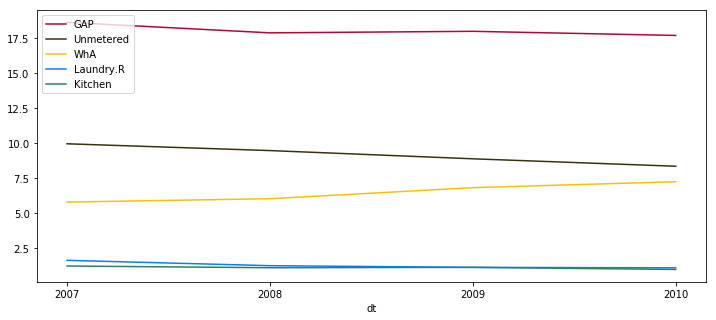

In [29]:
data.Global_active_power.resample('Y').mean().plot(color='#B40431', legend=True,figsize=(12, 5))
data.Sub_metering_4.resample('Y').mean().plot(color='#3A2F0B', legend=True,figsize=(12, 5))
data.Sub_metering_3.resample('Y').mean().plot(color='#FFBF00', legend=True,figsize=(12, 5))
data.Sub_metering_2.resample('Y').mean().plot(color='#0080FF', legend=True,figsize=(12, 5))
data.Sub_metering_1.resample('Y').mean().plot( color='#2d7f5e', legend=True,figsize=(12, 5))
#data.Global_intensity.resample('Y').sum().plot(color='g', legend=True)
#data.Voltage.resample('M').mean().plot(color='g', legend=True)
plt.legend(['GAP', 'Unmetered', 'WhA', 'Laundry.R', 'Kitchen'], loc='upper left')
#plt.savefig('Anual.png', dpi = 2400)
plt.show()
#plot(figsize=(19, 9))

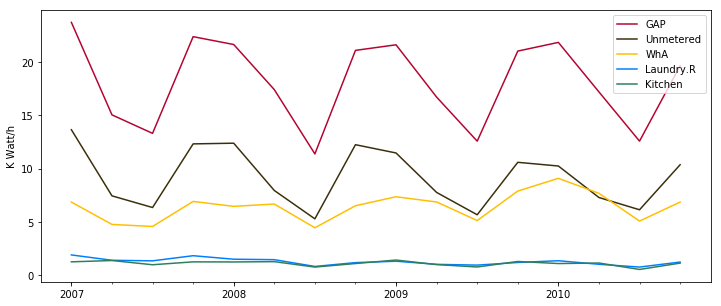

In [30]:
#fig, axes = plt.subplots(ncols=2)

a=data.Global_active_power.resample('Q').mean().plot(color='#B40431',stacked=True,legend=True,figsize=(12, 5))
b=data.Sub_metering_4.resample('Q').mean().plot(color='#3A2F0B',stacked=True,legend=True,figsize=(12, 5))
c=data.Sub_metering_3.resample('Q').mean().plot(color='#FFBF00',stacked=True,legend=True,figsize=(12, 5))
d=data.Sub_metering_2.resample('Q').mean().plot(color='#0080FF',stacked=True,legend=True,figsize=(12, 5))
e=data.Sub_metering_1.resample('Q').mean().plot( color='#2d7f5e',stacked=True,legend=True,figsize=(12, 5))
#data.Global_intensity.resample('M').mean().plot(color='g', legend=True)
#data.Voltage.resample('M').mean().plot(color='g', legend=True)
plt.legend(['GAP', 'Unmetered', 'WhA', 'Laundry.R', 'Kitchen'], loc='upper right')
#labels = [item.get_text() for item in b.get_yticklabels()]
#labels[1] = '0'
#labels[2] = '500'
#labels[3] = '1000'
#labels[4] = '1500'
#labels[5] = '2000'
#labels[6] = '2500'
#labels[7] = '3000'
#a.set_yticklabels(labels)
plt.xlabel("")
plt.ylabel("K Watt/h")
#plt.savefig('Seasonal.png', dpi = 4800)
plt.show()


In [31]:
#data_sorted =data.resample('M').mean()
#month=data_sorted.sort_values(by='Global_active_power', ascending=False, na_position='first')
#data_sorted.head(50)
#data_sorted.to_excel('exampleResult.xls', sheet_name='Sheet1')

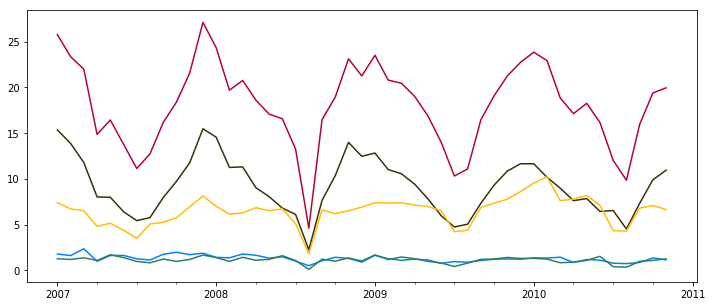

In [32]:
a=data.Global_active_power.resample('M').mean().plot(color='#B40431',stacked=True,figsize=(12, 5))
b=data.Sub_metering_4.resample('M').mean().plot(color='#3A2F0B',stacked=True,figsize=(12, 5))
c=data.Sub_metering_3.resample('M').mean().plot(color='#FFBF00',stacked=True,figsize=(12, 5))
d=data.Sub_metering_2.resample('M').mean().plot(color='#0080FF',stacked=True,figsize=(12, 5))
e=data.Sub_metering_1.resample('M').mean().plot( color='#2d7f5e',stacked=True,figsize=(12, 5))
#data.Global_intensity.resample('M').mean().plot(color='g', legend=True)
#data.Voltage.resample('M').mean().plot(color='g', legend=True)
#plt.legend(['GAP', 'Unmetered', 'WhA', 'Laundry.R', 'Kitchen'], loc='upper right')
#labels = [item.get_text() for item in b.get_yticklabels()]
#labels[1] = '0'
#labels[2] = '500'
#labels[3] = '1000'
#labels[4] = '1500'
#labels[5] = '2000'
#labels[6] = '2500'
#labels[7] = '3000'
#a.set_yticklabels(labels)
plt.xlabel("")
#plt.ylabel("K Watt/h")
#plt.savefig('Monthly.png', dpi = 2400)
plt.show()

In [33]:
#we.plot(color='blue',legend=True)

In [34]:
#sns.heatmap(data, xticklabels=data.Global_active_power, yticklabels=data.Sub_metering_4, vmin=-1, vmax=1)
#plt.show() 

In [35]:
data_2007=data['2007-01-01':'2007-12-31']
data_2008=data['2008-01-01':'2008-12-31']
data_2009=data['2009-01-01':'2009-12-31']
data_2010=data['2010-01-01':'2010-12-31']

In [49]:
data_sorted_max =data.resample('M').mean()
Max=data_sorted_max.sort_values(by='Global_active_power', ascending=False, na_position='first')
Max.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
dt,,,,,,,,
2007-12-31,27.107899,0.110900,241.725763,6.819557,1.659759,1.857815,8.118977,15.471348
2007-01-31,25.767232,0.132676,240.905101,6.546915,1.264237,1.775931,7.383351,15.343714
2008-01-31,24.332005,0.087552,240.646329,6.181716,1.383566,1.409328,6.993324,14.545787
2010-01-31,23.842082,0.125179,243.455510,5.945679,1.298200,1.362789,9.538004,11.643089
2009-01-31,23.503367,0.098491,243.793216,5.867071,1.672327,1.634266,7.383812,12.812962


In [37]:
data_sorted_min =data.resample('M').mean()
Min=data_sorted_min.sort_values(by='Global_active_power')
Min.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
dt,,,,,,,,
2008-08-31,4.608137,0.127807,240.433052,1.263569,0.086765,0.498768,1.784690,2.237914
2010-08-31,9.846303,0.127815,241.250381,2.564136,0.334073,0.721201,4.281526,4.509504
2009-07-31,10.302015,0.167756,242.017859,2.710288,0.408325,0.952774,4.210413,4.730503
2009-08-31,11.076979,0.188426,241.269762,2.934737,0.777686,0.873551,4.390135,5.035606
2007-07-31,11.122780,0.127481,237.671247,2.944133,0.967265,1.252174,3.478285,5.425056


In [38]:
week_min=data['2008-08-18':'2008-08-24']
day_min=data['2008-08-23':'2008-08-23']
week_max=data['2007-12-24':'2007-12-30']
day_max=data['2007-12-28':'2007-12-28']
#jan=data['2007-01-01':'2007-01-31']
#Feb=data['2007-02-01':'2007-02-28']

In [39]:
#data_sorted_w01 =week01.resample('Min').mean()
#data_sorted_w01.head(7)
#data_sorted_w01.to_excel('data_sorted_w01.xls', sheet_name='Sheet1')

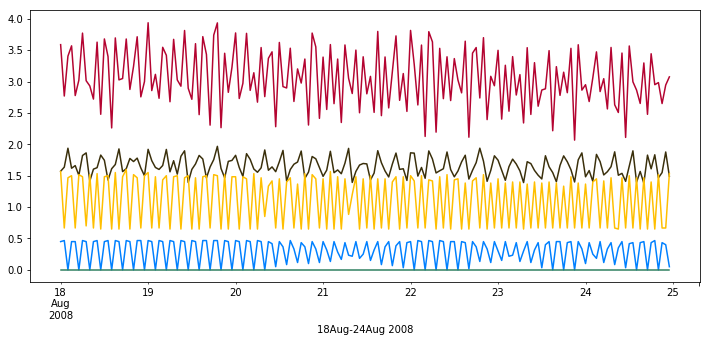

In [40]:
week_min.Global_active_power.resample('h').mean().plot(color='#B40431',stacked=True,figsize=(120, 5))
week_min.Sub_metering_4.resample('h').mean().plot(color='#3A2F0B',stacked=True,figsize=(12, 5))
week_min.Sub_metering_3.resample('h').mean().plot(color='#FFBF00',stacked=True,figsize=(12, 5))
week_min.Sub_metering_2.resample('h').mean().plot(color='#0080FF',stacked=True,figsize=(12, 5))
week_min.Sub_metering_1.resample('h').mean().plot(color='#2d7f5e',stacked=True,figsize=(12, 5))
#plt.legend(['GAP', 'Unmetered', 'WhA', 'Laundry.R', 'Kitchen'], loc='upper right')
plt.xlabel('18Aug-24Aug 2008')
#plt.ylabel('Kw/h')
#plt.savefig('Min-Weekly.png', dpi = 2400)
plt.show()

In [41]:
#data_sorted_d01 =day01.resample('Min').mean()
#data_sorted_w01.head(7)
#data_sorted_d01.to_excel('data_sorted_d01.xls', sheet_name='Sheet1')

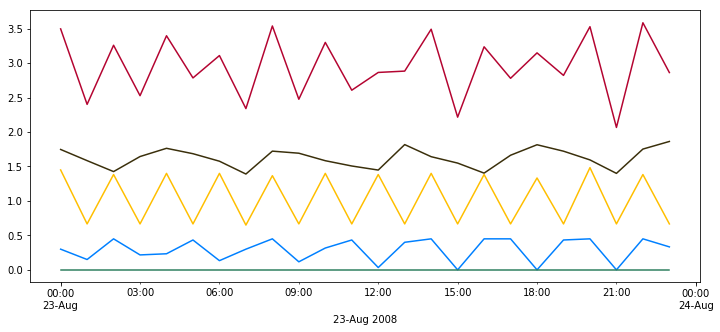

In [42]:
day_min.Global_active_power.resample('h').mean().plot(color='#B40431',stacked=True,figsize=(12, 5))
day_min.Sub_metering_4.resample('h').mean().plot(color='#3A2F0B',stacked=True,figsize=(12, 5))
day_min.Sub_metering_3.resample('h').mean().plot(color='#FFBF00',stacked=True,figsize=(12, 5))
day_min.Sub_metering_2.resample('h').mean().plot(color='#0080FF',stacked=True,figsize=(12, 5))
day_min.Sub_metering_1.resample('h').mean().plot(color='#2d7f5e',stacked=True,figsize=(12, 5))
#plt.legend(['GAP', 'Unmetered', 'WhA', 'Laundry.R', 'Kitchen'], loc='upper right')
plt.xlabel('23-Aug 2008')
#plt.ylabel('Kw/h')
#plt.savefig('Min-Daily.png', dpi = 2400)
plt.show()

In [43]:
#data_sorted_w02 =week02.resample('Min').mean()
#data_sorted_w01.head(7)
#data_sorted_w02.to_excel('data_sorted_w02.xls', sheet_name='Sheet1')

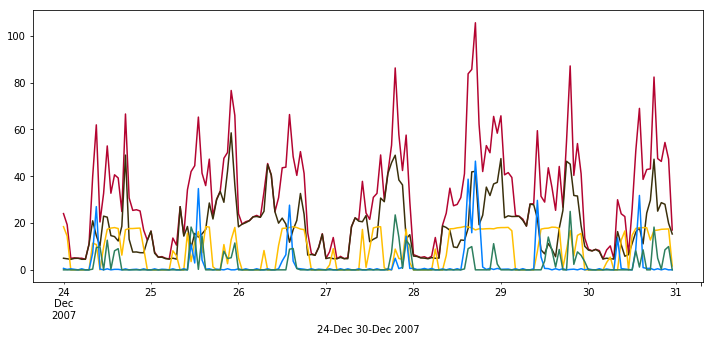

In [44]:
week_max.Global_active_power.resample('h').mean().plot(color='#B40431',stacked=True,figsize=(12, 5))
week_max.Sub_metering_4.resample('h').mean().plot(color='#3A2F0B',stacked=True,figsize=(12, 5))
week_max.Sub_metering_3.resample('h').mean().plot(color='#FFBF00',stacked=True,figsize=(12, 5))
week_max.Sub_metering_2.resample('h').mean().plot(color='#0080FF',stacked=True,figsize=(12, 5))
week_max.Sub_metering_1.resample('h').mean().plot(color='#2d7f5e',stacked=True,figsize=(12, 5))
#plt.legend(['GAP', 'Unmetered', 'WhA', 'Laundry.R', 'Kitchen'], loc='upper left')
plt.xlabel('24-Dec 30-Dec 2007')
#plt.ylabel('Kw/h')
#plt.savefig('Max-Weekly.png', dpi = 2400)
plt.show()

In [45]:
#data_sorted_d02 =day02.resample('Min').mean()
#data_sorted_w01.head(7)
#data_sorted_d02.to_excel('data_sorted_d02.xls', sheet_name='Sheet1')

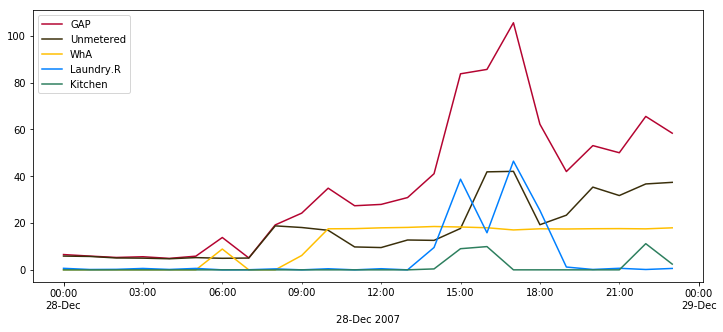

In [46]:
fig, ax =plt.subplots(1)
day_max.Global_active_power.resample('h').mean().plot(color='#B40431',stacked=True,legend=True,figsize=(12, 5))
day_max.Sub_metering_4.resample('h').mean().plot(color='#3A2F0B',stacked=True,legend=True,figsize=(12, 5))
day_max.Sub_metering_3.resample('h').mean().plot(color='#FFBF00',stacked=True,legend=True,figsize=(12, 5))
day_max.Sub_metering_2.resample('h').mean().plot(color='#0080FF',stacked=True,legend=True,figsize=(12, 5))
day_max.Sub_metering_1.resample('h').mean().plot(color='#2d7f5e',stacked=True,legend=True,figsize=(12, 5))
plt.legend(['GAP', 'Unmetered', 'WhA', 'Laundry.R', 'Kitchen'], loc='upper left')
plt.xlabel('28-Dec 2007')
#plt.ylabel('Kw/h')
#plt.savefig('Max-Daily.png', dpi = 2400)
plt.show()

In [47]:
#plt.matshow(data.corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
#plt.title('without resampling', size=10)
#plt.colorbar()
#plt.show()
#autocorrelation_plot(data)
#pyplot.show()

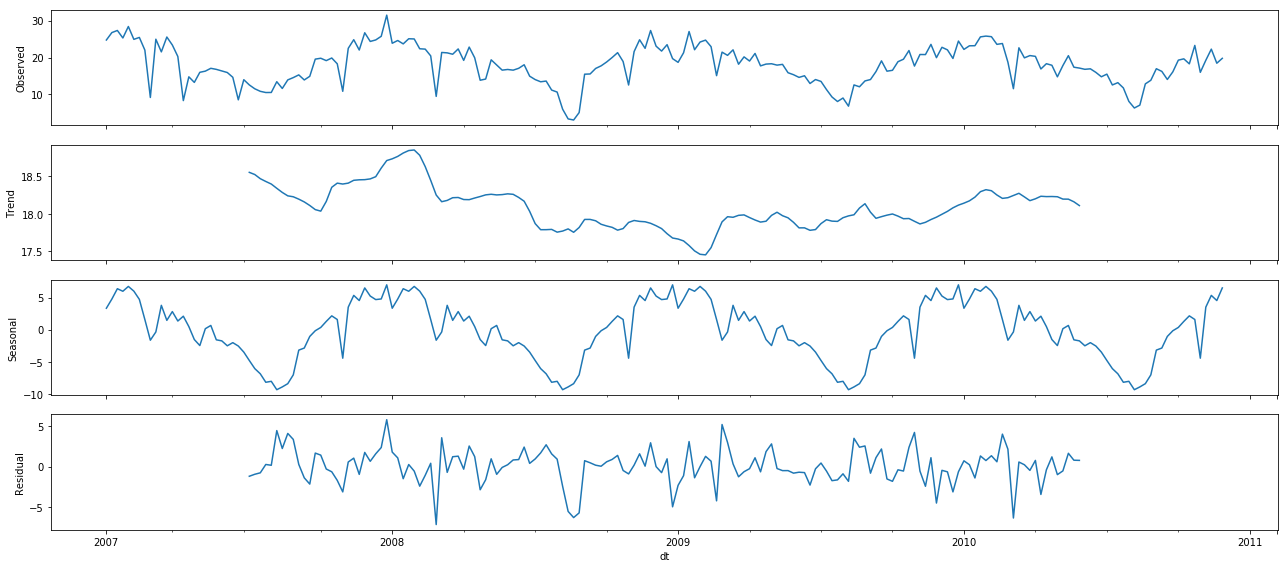

In [51]:
y = data['Global_active_power'].resample('W').mean()
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
#plt.savefig('Trend-Seasonal.png', dpi = 1200)
plt.show()